In [157]:
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np

In [158]:
# CONSTANTS:
FILE_PREFIX = 'ts_'
FILE_SUFFIX = '.dat'
SAMPLING_FREQUENCY = 22 * 1_000  # 22 kHz
NUM_SAMPLES = SAMPLING_FREQUENCY  # SAMPLING_FREGUENCY samples
CUTOFF_FREQUENCY = 2000  # 2 kHz

In [159]:
def butterworth_filter(signal_data, cutoff_freq=2000, sampling_rate=22000, order=2):
    b, a = signal.butter(order, cutoff_freq, btype='low',
                         output='ba', fs=sampling_rate)
    # print(b[0], b[1], b[2], a[0], a[1], a[2])
    filtered_signal = signal.lfilter(b, a, signal_data)
    return filtered_signal

In [160]:
# Load the signals from files.

# Test sine wave signal:
sine_wave = np.fromfile(
    FILE_PREFIX + 'sine' + FILE_SUFFIX, dtype=np.uint16, sep='\n')

# Filtered sine wave signal:

filtered_sine_wave = np.fromfile('../removeme.dat', dtype=np.uint16, sep='\n')

# Adjust for the rezeroing of the signal:
filtered_sine_wave = (filtered_sine_wave.astype(np.int32) - 32768) * 2

# Reference filtering:
scipy_filtered_sine = butterworth_filter(
    sine_wave, cutoff_freq=CUTOFF_FREQUENCY, sampling_rate=SAMPLING_FREQUENCY, order=2)


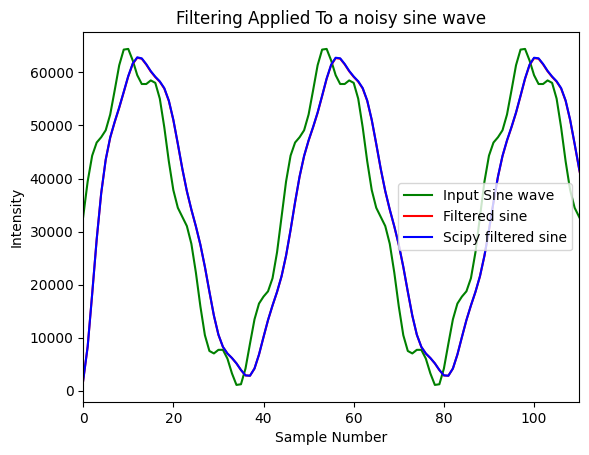

In [161]:
# Plot the signals:

# Plot the sine wave:
plt.plot(sine_wave, label='Input Sine wave', color='green')
plt.plot(filtered_sine_wave, label='Filtered sine', color='red')
plt.plot(scipy_filtered_sine, label='Scipy filtered sine', color='blue')

plt.xlim(0, SAMPLING_FREQUENCY * 0.005)

plt.title('Filtering applied to a noisy sine wave')
plt.xlabel('Sample Number')
plt.ylabel('Intensity')
plt.legend()
plt.show()
